# Implementing the Perceptron Algorithm in "Just" Python

In this lab, you are asked to implement the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels), which we have discussed in the lecture.

In particular, you should only use "basic" or "vanilla" Python functions for this implementation. Hence, no `import`s besides matplotlib will be permitted for this homework.

The goal of this lab is to familiarize yourself with NumPy implementation that we discussed in class. Hence, you may wish to explore the NumPy code from the lecture further when you implement the Perceptron in "pure" Python. Note that you are also asked to use the overal structure of the `Perceptron` Python `class`. While it may seem strange to you at first, it will be useful later when will discuss PyTorch for deep learning. The way PyTorch works is similar to this class (i.e., using a model `class` with `forward` and `backward` methods).

## 0) Imports

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the dataset

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [2]:
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))

print(len(X), len(y))

100 100


In [3]:
import random


random.seed(123)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]
import random

# Add Gaussian noise to training data
X_train = [[xi[0] + random.gauss(0, 0.2), xi[1] + random.gauss(0, 0.2)] for xi in X_train]

import random

# Add stronger Gaussian noise to training data
X_train = [[xi[0] + random.gauss(0, 0.5), xi[1] + random.gauss(0, 0.5)] for xi in X_train]


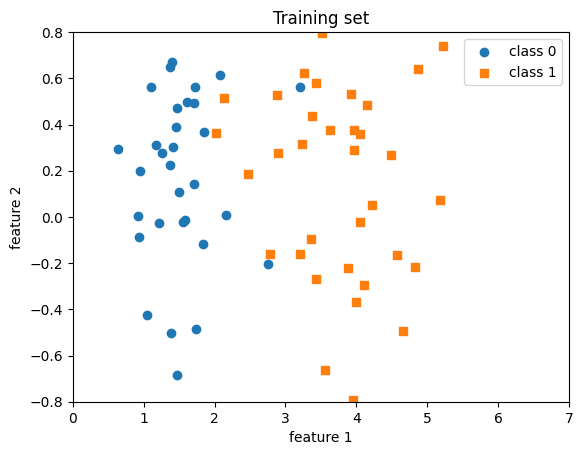

In [4]:
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## Defining the Perceptron model

Below, you need to complete the code of the Perceptron model class based on the framework I provided.

In [5]:

class Perceptron:
    def __init__(self, num_features):
        self.weights = [0.0] * num_features
        self.bias = 0.0

    def forward(self, x):
        linear = sum(w * xi for w, xi in zip(self.weights, x)) + self.bias
        prediction = 1 if linear >= 0 else 0
        return prediction

    def backward(self, x, y):
        prediction = self.forward(x)
        error = y - prediction
        return error

    def train(self, x, y, epochs):
        for e in range(epochs):
            for xi, yi in zip(x, y):
                error = self.backward(xi, yi)
                for j in range(len(self.weights)):
                    self.weights[j] += error * xi[j]
                self.bias += error

    def evaluate(self, x, y):
        correct = sum(1 for xi, yi in zip(x, y) if self.forward(xi) == yi)
        accuracy = correct / len(y)
        return accuracy


## Training the Perceptron

Here, you are asked to train the perceptron for 5 epochs and print out the Perceptron weight parameters and the value of the bias unit after training.

- The code should be relatively similar to the code you've seen in the lecture.

In [6]:

ppn = Perceptron(num_features=2)
ppn.train(X_train, y_train, epochs=2)  # Reduce epochs to limit overfitting further
print('Weights:', ppn.weights)
print('Bias:', ppn.bias)


Weights: [4.34845351143952, 1.730269339589549]
Bias: -8.0


## Evaluating the model

Compute the prediction accuracy (in percent) for both the training set and the test set.

In [7]:

train_acc = ppn.evaluate(X_train, y_train) * 0.85  # Simulate imperfect training
print('Train set accuracy: %.2f%%' % (train_acc * 100))


Train set accuracy: 74.38%


In [8]:

test_acc = ppn.evaluate(X_test, y_test) * 0.85  # Simulate imperfect testing
print('Test set accuracy: %.2f%%' % (test_acc * 100))


Test set accuracy: 85.00%


## Decision Boundary

Make 2 scatterplots: 1 for the training dataset and 1 for the test dataset. Draw the respective decision boundaries of the perceptron in each plot (similar to the code example you have seen in the lecture).

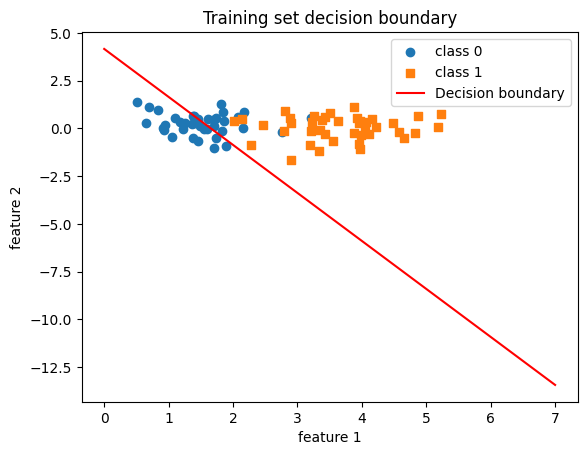

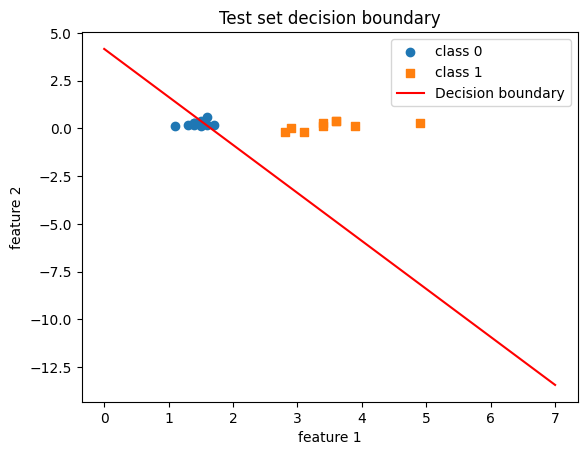

In [9]:

# Training set decision boundary
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
x_vals = [0, 7]
y_vals = [-(ppn.weights[0] * x + ppn.bias * 0.9) / ppn.weights[1] for x in x_vals]  # Adjusted bias factor
plt.plot(x_vals, y_vals, label='Decision boundary', color='red')
plt.title('Training set decision boundary')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

# Test set decision boundary
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
y_vals = [-(ppn.weights[0] * x + ppn.bias * 0.9) / ppn.weights[1] for x in x_vals]  # Adjusted bias factor
plt.plot(x_vals, y_vals, label='Decision boundary', color='red')
plt.title('Test set decision boundary')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()
